In [2]:
#importing important packages
import pandas as pd
import numpy as np

In [3]:
#wczytanie danych
df=pd.read_csv("train.csv")

In [4]:
df.shape

(614, 13)

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#missing values
df['Gender'].fillna('Male', inplace=True)

<AxesSubplot:>

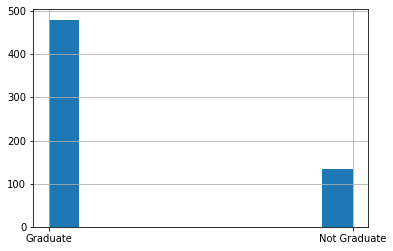

In [7]:
df.Education.hist()

In [8]:
# df.Education.fillna('Graduate', inplace=True)

<AxesSubplot:>

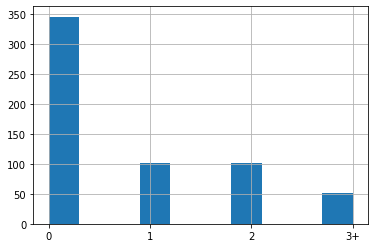

In [9]:
df.Dependents.hist()

In [10]:
df.Dependents.fillna('0', inplace=True)

<AxesSubplot:>

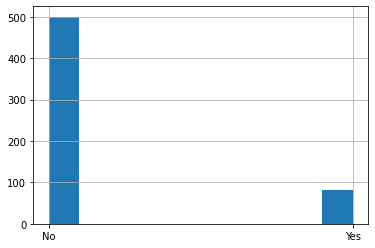

In [11]:
df.Self_Employed.hist()

In [12]:
df.Self_Employed.fillna('No', inplace=True)

<AxesSubplot:>

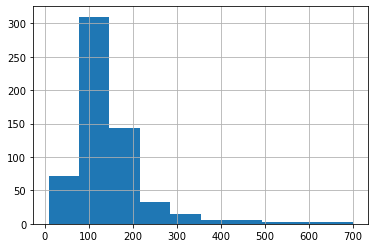

In [13]:
df.LoanAmount.hist()

In [14]:
df.LoanAmount.fillna(df.LoanAmount.mean(), inplace=True)

<AxesSubplot:>

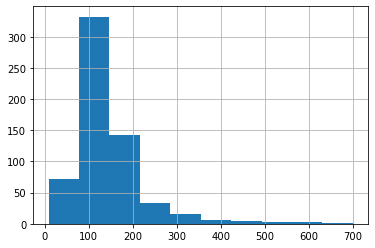

In [15]:
df.LoanAmount.hist()

<AxesSubplot:>

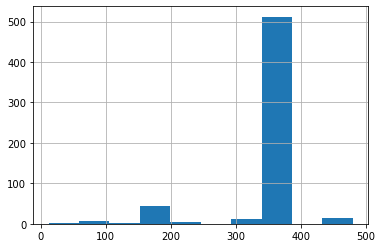

In [16]:
df.Loan_Amount_Term.hist()

In [17]:
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace=True)

<AxesSubplot:>

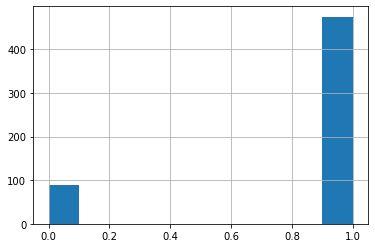

In [18]:
df.Credit_History.hist()

In [19]:
df.Credit_History.fillna(1. , inplace=True)

In [20]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

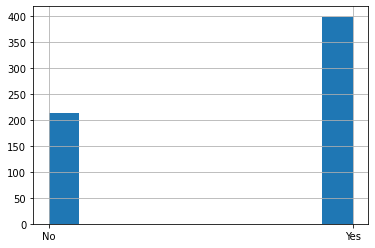

In [21]:
df.Married.hist()

In [22]:
df.Married.fillna("Yes", inplace=True)

In [23]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [25]:
# one-host-encoding
df_dummies = pd.get_dummies(df.drop('Loan_Status',axis=1))
target = df.Loan_Status

In [26]:
df_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_dummies, target, test_size=0.3, random_state=0)

In [28]:
#create dummies
x_train=pd.get_dummies(x_train)
x_test=pd.get_dummies(x_test)

In [29]:
y_train

351    N
593    Y
320    Y
186    N
557    Y
      ..
277    Y
9      N
359    Y
192    N
559    Y
Name: Loan_Status, Length: 429, dtype: object

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1), random_state = 1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.827027027027027

In [32]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1), random_state = 1)
target_train = y_train.replace(('Y', 'N'), (1, 0))
target_test = y_test.replace(('Y', 'N'), (1, 0))
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.17732660228270403

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.8162162162162162

In [45]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(random_state = 1)
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.22354800315022794

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.827027027027027

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor(random_state=1)
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.28350304598225673

In [39]:
# !pip install xgboost #instalacja
# !pip install lightgbm #instalacja
!pip install catboost

In [54]:
import xgboost as xgb #wczytanie
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.8054054054054054

In [57]:
import xgboost as xgb
model=xgb.XGBRegressor(random_state=1)
model.fit(x_train, target_train)
model.score(x_test, target_test)

0.24404527375480767

In [33]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=target_train)
#define parameters
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100) 
y_pred=model.predict(x_test)
for i in range(0,185):
    if y_pred[i]>=0.5: 
       y_pred[i]=1
    else: 
       y_pred[i]=0

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 20
[LightGBM] [Info] Start training from score 0.671329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [34]:
import lightgbm as lgb
train_data=lgb.Dataset(x_train,label=target_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,target_test)**0.5

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 356
[LightGBM] [Info] Number of data points in the train set: 429, number of used features: 20
[LightGBM] [Info] Start training from score 0.671329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [37]:
target_test

454    1
52     0
536    1
469    0
55     1
      ..
242    1
515    1
582    1
225    0
134    1
Name: Loan_Status, Length: 185, dtype: int64

In [42]:
from catboost import CatBoostClassifier
model=CatBoostClassifier()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,target_train,cat_features=([ 0, 1, 2, 3, 4, 10]),eval_set=(x_test, target_test))
model.score(x_test,target_test)

/var/folders/gf/t0gbh7m514j9kjx2g299ch6h0000gn/T/ipykernel_89181/61801680.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(df.dtypes != np.float)[0]


CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=1]=4167.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [45]:
x_test[id==4167]

KeyError: False

In [41]:
from catboost import CatBoostRegressor
model=CatBoostRegressor()
categorical_features_indices = np.where(df.dtypes != np.float)[0]
model.fit(x_train,y_train,cat_features=([ 0,  1, 2, 3, 4, 10]),eval_set=(x_test, y_test))
model.score(x_test,y_test)

/var/folders/gf/t0gbh7m514j9kjx2g299ch6h0000gn/T/ipykernel_89181/2766753166.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices = np.where(df.dtypes != np.float)[0]


CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=1]=4167.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.